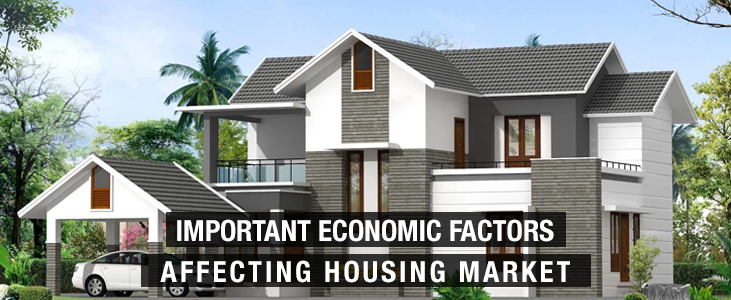

   ##                       PROJECT -  Factors impacting US home prices

## Table of Contents
#### 1. Problem Statement
#### 2. Project Objective
#### 3. Data Description
#### 4. Data Pre-processing Steps
#### 5. EDA
#### 6. Choosing the Algorithm
#### 7. Model Evaluation and Techniques
#### 8. Inferences from the Same
#### 9. Future Possibilities of the Project
#### 10. Conclusion

## Problem Statement

#### Summary Problem Statement
The task at hand involves constructing a comprehensive data science model that elucidates the impact of various key factors on US home prices over the last two decades. The objective is to analyze and understand the correlation between these influential factors and the fluctuations observed in the S&P Case-Schiller Home Price Index, serving as a reliable proxy for home prices on a national scale.

## Project Objective

The primary objective of this project is to unravel and comprehend the intricate relationship between key factors and the fluctuations observed in US home prices over a substantial period of two decades. By focusing on the S&P Case-Schiller Home Price Index as a proxy for home prices on a national scale, the aim is to conduct a comprehensive data analysis and modeling exercise to discern the impacts of various influential factors on this critical economic indicator.

Data Gathering: Acquire diverse and publicly available datasets encompassing crucial economic, demographic, and real estate-related factors known to influence home prices. This involves meticulous sourcing of data spanning the last 20 years from reputable sources.

Data Integration and Preparation: Organize, clean, and consolidate the collected datasets into a unified and consistent format suitable for analysis. Handle missing values, standardize data formats, and ensure data quality for robust modeling.

Feature Identification and Engineering: Identify significant features within the datasets and potentially create new ones to capture nuanced relationships and trends. Feature engineering aims to maximize the explanatory power of the model.

Model Development: Utilize advanced data science techniques such as regression analysis, time-series modeling, or machine learning algorithms to build a predictive model. This model should showcase how various factors impact the S&P Case-Schiller Home Price Index and offer insights into their relative importance and influence.

Model Evaluation and Validation: Assess the model's accuracy, reliability, and generalizability by validating it against historical data. Employ suitable evaluation metrics to ensure the model effectively captures the nuances of home price fluctuations.

Insights Generation: Derive meaningful and actionable insights from the model outputs. Understand the relationships and trends between different factors and home prices, highlighting which variables exert the most significant influence and how they affect the housing market dynamics.

Communication of Findings: Effectively communicate the findings, insights, and predictive capabilities of the model to stakeholders, policymakers, or individuals interested in understanding the factors influencing US home prices. Utilize visualizations, summaries, and clear explanations to convey complex relationships in an accessible manner.

In [2]:
## importing the library 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


from scipy import stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\hp\Desktop\ALL DATASET\Dataset_1.csv').set_index("DATE")

In [4]:
df.head()

,CSUSHPISA,Year,Month,UNRATE,CPI,GDP,MRATE,NewHome,Vacanthome,UMCSENT,Concost,POPTHM
DATE,,,,,,,,,,,,
2003-09-01,136.294,2003,9,6.1,2.184248,NaN,6.1475,3.8,NaN,87.7,463954.0,291222.0
2003-10-01,137.531,2003,10,6.0,2.161113,11772.234,5.9520,3.8,15654.0,89.6,475234.0,291463.0
2003-11-01,138.794,2003,11,5.8,2.036593,NaN,5.9325,4.1,NaN,93.7,490441.0,291677.0
2003-12-01,140.179,2003,12,5.7,1.976213,NaN,5.8760,4.0,NaN,92.6,508637.0,291868.0
2004-01-01,141.646,2004,1,5.7,1.960723,11923.447,5.7125,3.8,15895.0,103.8,503659.0,292046.0


In [5]:
df.shape

(241, 12)

## Data Description

### The dataset contains 241 rows and 13 columns.

1. **Unemployment Rate:** Percentage of unemployed individuals in the labor force, indicating job market conditions and potential impacts on home buying.

2. **Mortgage Rates:** Interest rates on loans for home purchase, influencing affordability and impacting people's ability to afford homes.

3. **Consumer Price Index (CPI):** Measurement of average price changes in a basket of goods and services, indicating overall inflation trends and its influence on home purchasing power.

4. **Gross Domestic Product (GDP):** Total value of goods and services produced, reflecting economic health and affecting consumer confidence in home buying.

5. **Monthly New House Construction:** Count of newly constructed homes, impacting overall housing supply and potentially affecting home prices.

6. **Vacant Houses:** Number of unoccupied homes, providing insight into housing inventory levels and market saturation.

7. **Consumer Sentiment Index:** Measure of public perception about the economy, impacting individuals' decisions on buying homes.

8. **Construction Costs:** Expenses associated with building homes, indicating trends in building expenses and their influence on home prices.

9. **Population Trends:** Changes in population size, influencing housing demand and market dynamics.

10. **S&P Case-Schiller Home Price Index:** A benchmark measuring changes in home prices, indicating trends in the housing market.


In [6]:
df1 = df.copy() #creating a copy for future reffrence

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 2003-09-01 to 2023-09-01
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CSUSHPISA   241 non-null    float64
 1   Year        241 non-null    int64  
 2   Month       241 non-null    int64  
 3   UNRATE      241 non-null    float64
 4   CPI         241 non-null    float64
 5   GDP         80 non-null     float64
 6   MRATE       241 non-null    float64
 7   NewHome     241 non-null    float64
 8   Vacanthome  80 non-null     float64
 9   UMCSENT     241 non-null    float64
 10  Concost     241 non-null    float64
 11  POPTHM      241 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 24.5+ KB


## Data Pre-processing Steps

In [8]:
df.isnull().sum() # We can see that we have null values in GDP and vacant home column because the dataset is Q 

CSUSHPISA       0
Year            0
Month           0
UNRATE          0
CPI             0
GDP           161
MRATE           0
NewHome         0
Vacanthome    161
UMCSENT         0
Concost         0
POPTHM          0
dtype: int64

In [9]:
df['GDP'] = df['GDP'].interpolate(method='linear') #filling the null value using the interpolate method
df['Vacanthome'] = df['Vacanthome'].interpolate(method='linear')

In [10]:
df.describe()

,CSUSHPISA,Year,Month,UNRATE,CPI,GDP,MRATE,NewHome,Vacanthome,UMCSENT,Concost,POPTHM
count,241.000000,241.000000,241.000000,241.000000,241.000000,240.000000,241.000000,241.000000,240.000000,241.000000,241.000000,241.000000
mean,186.860714,2013.207469,6.510373,5.920747,2.521151,17919.133638,4.720892,6.269295,17116.554167,81.618672,507655.290456,316392.186722
std,46.242191,5.820090,3.455807,2.081382,1.122993,4094.469912,1.154606,1.924115,1363.219132,12.958119,192391.726041,13416.739200
min,136.294000,2003.000000,1.000000,3.400000,0.667614,11772.234000,2.684000,3.300000,13876.000000,50.000000,244399.000000,291222.000000
25%,151.338000,2008.000000,4.000000,4.400000,2.047850,14661.370500,3.802500,4.900000,15892.000000,71.800000,348206.000000,305158.000000
50%,175.739000,2013.000000,7.000000,5.200000,2.313886,17152.322167,4.457500,5.700000,17304.000000,82.600000,513524.000000,317635.000000
75%,204.349000,2018.000000,9.000000,7.300000,2.632103,20744.275500,5.830000,7.400000,18288.500000,93.200000,597200.000000,329216.000000
max,311.175000,2023.000000,12.000000,14.700000,6.617223,27644.463000,7.200000,12.200000,19137.000000,103.800000,979044.000000,335675.000000


In [11]:
# As per the objective we dont need the year and month column 
df.drop(columns=['Month'],inplace=True,axis=1)

In [12]:
df = df.rename(columns={'CSUSHPISA':'PRICE'}) 

## Exploratory Data Analysis- EDA

In [13]:
df.columns

Index(['PRICE', 'Year', 'UNRATE', 'CPI', 'GDP', 'MRATE', 'NewHome',
       'Vacanthome', 'UMCSENT', 'Concost', 'POPTHM'],
      dtype='object')

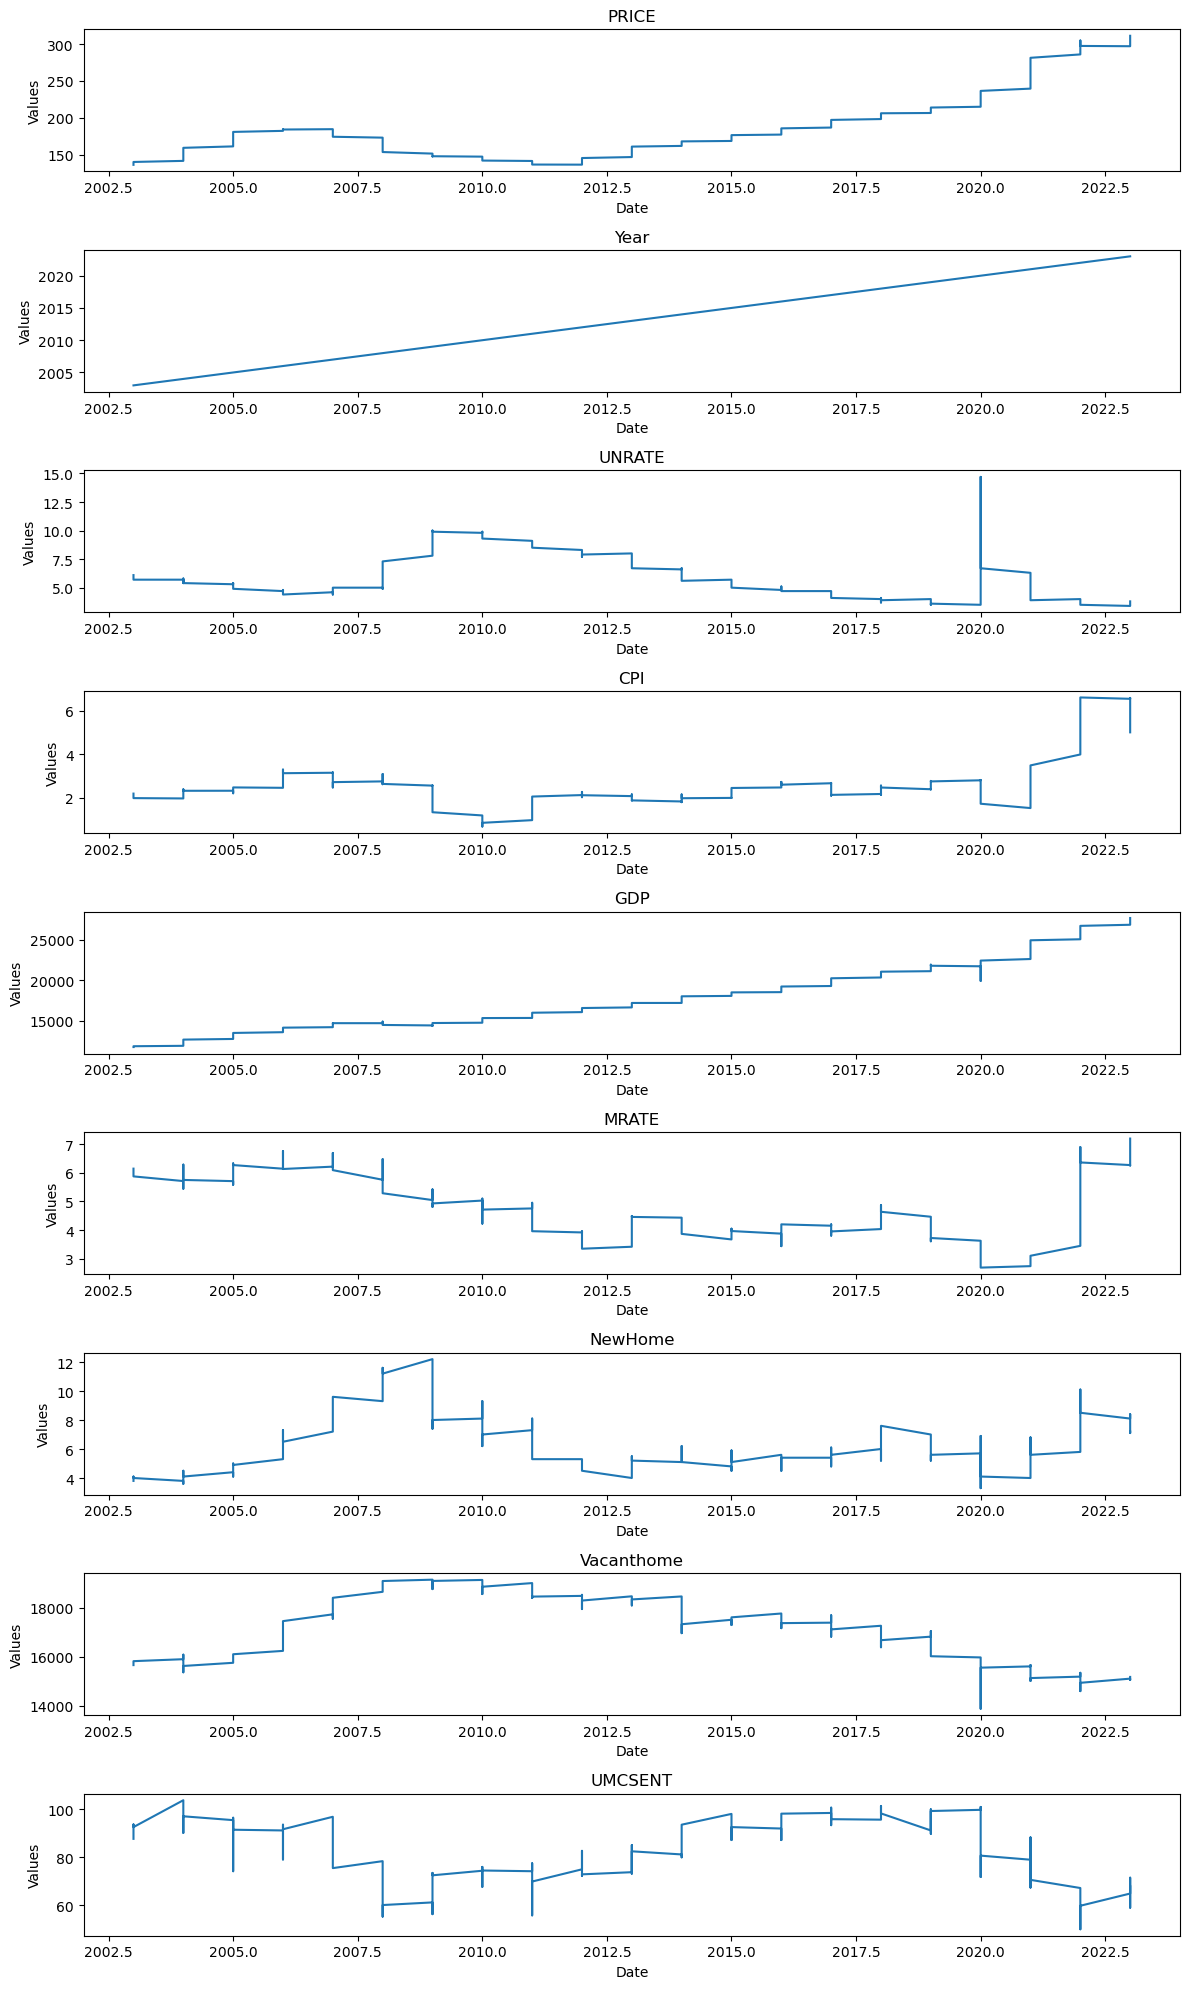

In [14]:
num_features = 9

# Create subplots for each feature
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(12, 20))  # Adjust figure size as needed

# Plot line plots for each feature in separate subplots
for i, column in enumerate(df.columns[:num_features]):
    axes[i].plot(df['Year'], df[column])
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [15]:
#This is the distribution of feature over 20 year of time. 

Plot correlastion matrix for better understanding of the feature 
Correlation refers to the statistical measure that describes the extent to which two variables are linearly related. It quantifies the strength and direction of the relationship between two numeric variables.
Correlation values lie between -1 and 1

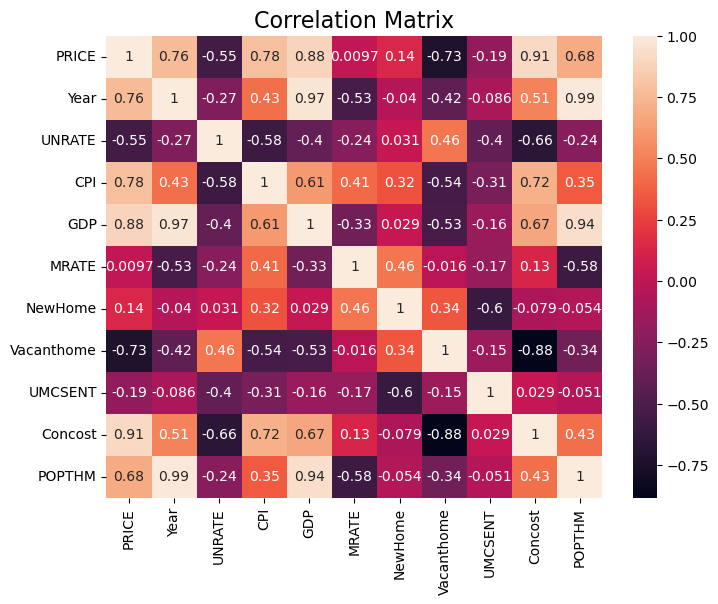

In [16]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.savefig('correlation_matrix.png')
plt.show()

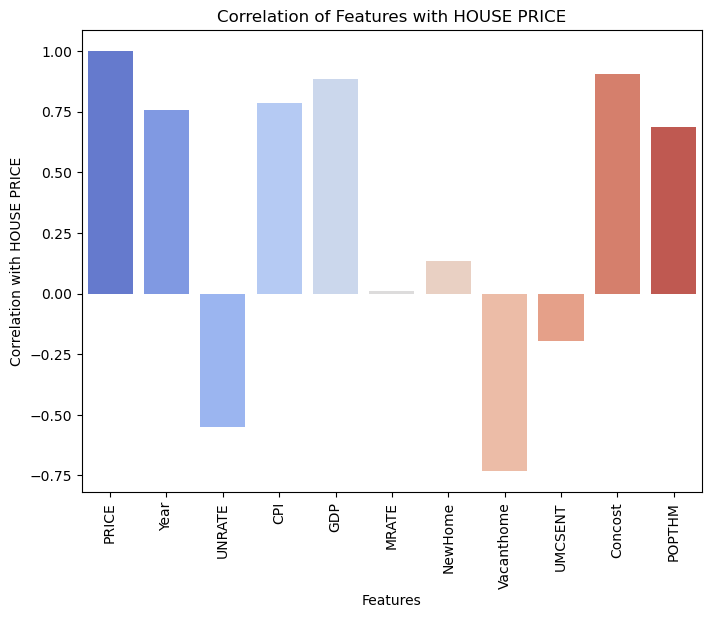

In [17]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Filter the correlation values for 'WeeklySales'
correlation = corr_matrix['PRICE']

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with HOUSE PRICE')
plt.title('Correlation of Features with HOUSE PRICE')
plt.show()

### Summary of Correlation Analysis between Key Factors and House Prices

### Negative Correlation

* **Unemployment Rate:**
  When there are more people without jobs, it usually means people might struggle to buy houses. High unemployment often brings house prices down because fewer people can afford to buy homes.

* **Vacant Houses:**
  Having lots of empty houses means there's too much supply and not enough demand. This can push house prices down because sellers might lower prices to attract buyers.

* **Mortgage Rate:**
  Expensive loans (higher mortgage rates) mean fewer people can afford to borrow money for a home. High rates might make people hesitate to buy, potentially slowing down house price growth.

* **Consumer Sentiment:**
  Low confidence in the economy might make people hold off on big purchases like houses, affecting how much they're willing to pay.

### Positive Correlation 

* **CPI (Cost of Living):**
  When the overall cost of things goes up (inflation), including groceries, gas, etc., it often means houses might become more expensive too.

* **GDP (Economic Health):**
  A strong economy (higher GDP) can lead to an increase in house prices as people feel more confident and have more money to spend.

* **Monthly New House Construction:**
  More new houses mean more choices for buyers. But too many new houses and not enough buyers could lead to price drops.

* **Construction Costs:**
  Higher building expenses might lead to higher house prices as builders charge more to cover costs.

* **Population Trends:**
  More people moving in usually means higher demand for houses, potentially leading to higher prices.

In [18]:
# Feature wise impact on house price 

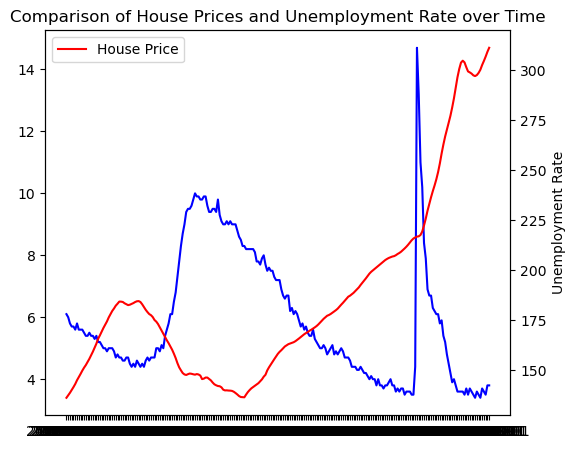

In [19]:
plt.figure(figsize=(6, 5))

# Plotting Unemployment Rate
plt.plot(df.index, df['UNRATE'], color='blue', label='Unemployment Rate')

# Creating a secondary y-axis for House Prices
plt.twinx()
plt.plot(df.index, df['PRICE'], color='red', label='House Price')

# Adding labels and legend
plt.title('Comparison of House Prices and Unemployment Rate over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()

In [20]:
# As we can see when the unemployment is high the price of house are lower. 

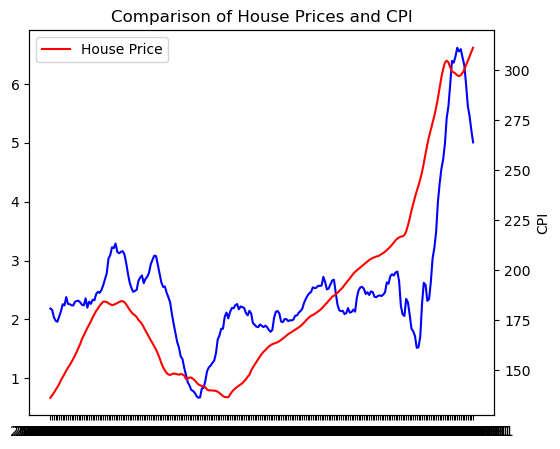

In [21]:
plt.figure(figsize=(6, 5))

# Plotting Unemployment Rate
plt.plot(df.index, df['CPI'], color='blue', label='CPI')

# Creating a secondary y-axis for House Prices
plt.twinx()
plt.plot(df.index, df['PRICE'], color='red', label='House Price')

# Adding labels and legend
plt.title('Comparison of House Prices and CPI')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()

In [22]:
#CPI have a impact on sales price but not that much but in recent trend impact have been less.

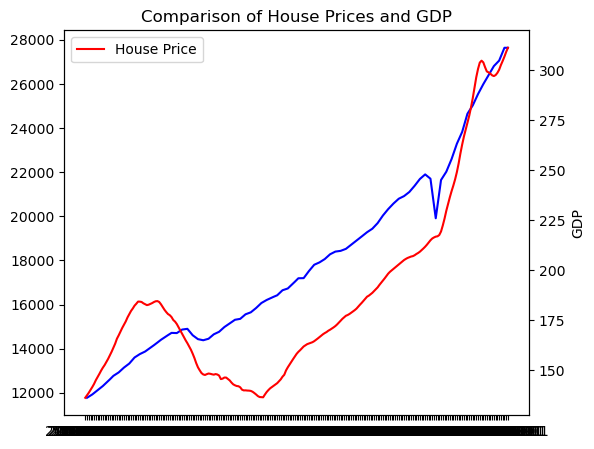

In [23]:
plt.figure(figsize=(6, 5))

# Plotting Unemployment Rate
plt.plot(df.index, df['GDP'], color='blue', label='GDP')

# Creating a secondary y-axis for House Prices
plt.twinx()
plt.plot(df.index, df['PRICE'], color='red', label='House Price')

# Adding labels and legend
plt.title('Comparison of House Prices and GDP')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()

In [24]:
# As we see the more GDP perform better, the more the house price get.

In [25]:
df.columns

Index(['PRICE', 'Year', 'UNRATE', 'CPI', 'GDP', 'MRATE', 'NewHome',
       'Vacanthome', 'UMCSENT', 'Concost', 'POPTHM'],
      dtype='object')

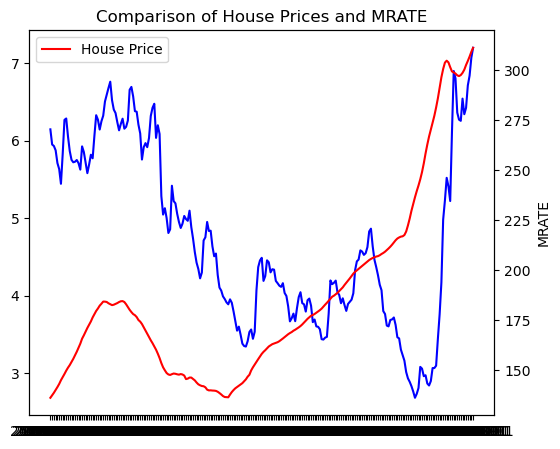

In [26]:
plt.figure(figsize=(6, 5))

# Plotting Unemployment Rate
plt.plot(df.index, df['MRATE'], color='blue', label='MRATE')

# Creating a secondary y-axis for House Prices
plt.twinx()
plt.plot(df.index, df['PRICE'], color='red', label='House Price')

# Adding labels and legend
plt.title('Comparison of House Prices and MRATE')
plt.xlabel('Date')
plt.ylabel('MRATE')
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()

In [27]:
# We can see the higher the MRATE lower the house price , But in recent time price and Mrate are at same level

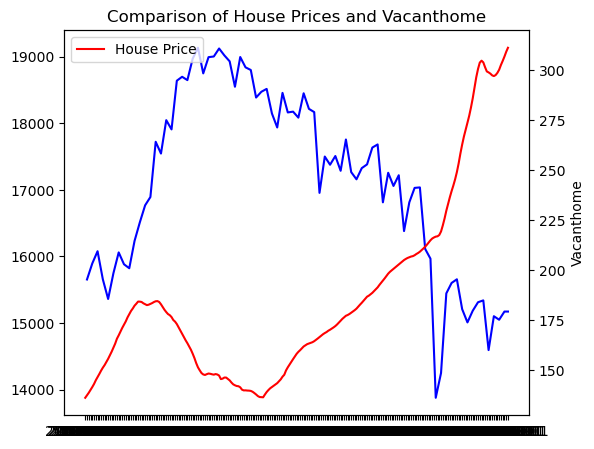

In [28]:
plt.figure(figsize=(6, 5))

# Plotting Unemployment Rate
plt.plot(df.index, df['Vacanthome'], color='blue', label='Vacanthome')

# Creating a secondary y-axis for House Prices
plt.twinx()
plt.plot(df.index, df['PRICE'], color='red', label='House Price')

# Adding labels and legend
plt.title('Comparison of House Prices and Vacanthome')
plt.xlabel('Date')
plt.ylabel('Vacanthome')
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()

In [29]:
## We can see that the more vacant house in the nation the lower is the house price ,In recent time the vacant house 
## are at all time low

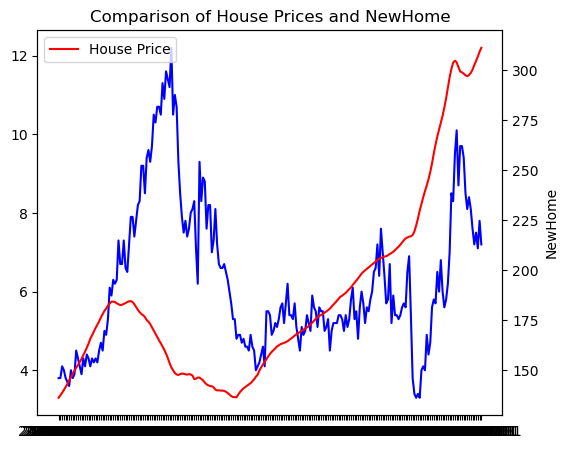

In [30]:
plt.figure(figsize=(6, 5))

# Plotting Unemployment Rate
plt.plot(df.index, df['NewHome'], color='blue', label='NewHome')

# Creating a secondary y-axis for House Prices
plt.twinx()
plt.plot(df.index, df['PRICE'], color='red', label='House Price')

# Adding labels and legend
plt.title('Comparison of House Prices and NewHome')
plt.xlabel('Date')
plt.ylabel('NewHome')
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()

In [31]:
 # The more new house in the market the less the price get. Recently the price is high. 

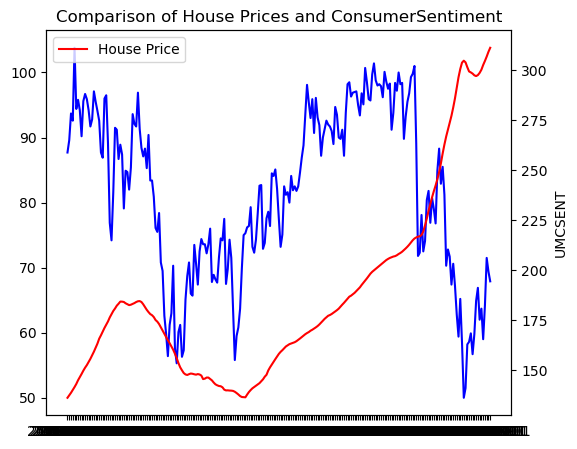

In [32]:
plt.figure(figsize=(6, 5))

# Plotting Unemployment Rate
plt.plot(df.index, df['UMCSENT'], color='blue', label='UMCSENT')

# Creating a secondary y-axis for House Prices
plt.twinx()
plt.plot(df.index, df['PRICE'], color='red', label='House Price')

# Adding labels and legend
plt.title('Comparison of House Prices and ConsumerSentiment')
plt.xlabel('Date')
plt.ylabel('UMCSENT')
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()

In [33]:
# when the consumer sentiment is high they spend on house and prices goes down , but in recent time when cosnumer sentiment 
# are low still the price is high due to low vacant house and new home
# unemployment is at low level and the GDP is doing well than last few year

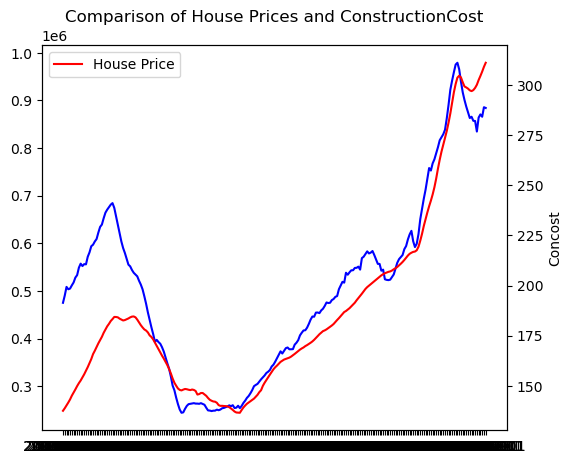

In [70]:
plt.figure(figsize=(6, 5))

# Plotting Unemployment Rate
plt.plot(df.index, df['Concost'], color='blue', label='Concost')

# Creating a secondary y-axis for House Prices
plt.twinx()
plt.plot(df.index, df['PRICE'], color='red', label='House Price')

# Adding labels and legend
plt.title('Comparison of House Prices and ConstructionCost')
plt.xlabel('Date')
plt.ylabel('Concost')
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()

In [35]:
# The cost of construction cost and house price are almost same , As the more the making cost the more house price 

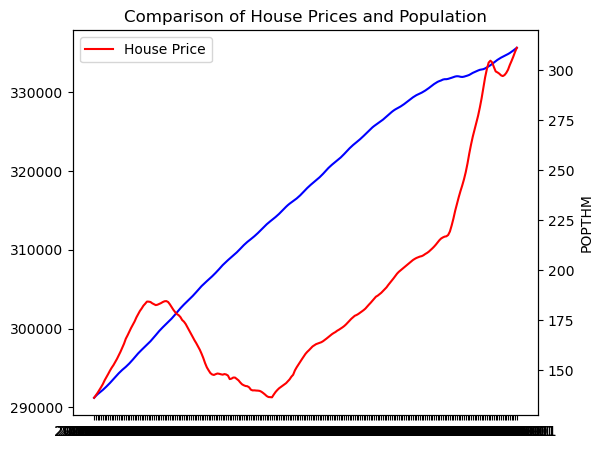

In [36]:
plt.figure(figsize=(6, 5))

# Plotting Unemployment Rate
plt.plot(df.index, df['POPTHM'], color='blue', label='POPTHM')

# Creating a secondary y-axis for House Prices
plt.twinx()
plt.plot(df.index, df['PRICE'], color='red', label='House Price')

# Adding labels and legend
plt.title('Comparison of House Prices and Population')
plt.xlabel('Date')
plt.ylabel('POPTHM')
plt.legend(loc='upper left')
plt.xticks(rotation=20)
plt.show()

In [37]:
# Population increase is very steady and the price is very low comapring with the population , but in recent time the price 
# have increased with the population 
# As we can see there is not a very significant change in price for long time still when population was on increase so other
# factors are effecting more so I will drop population for model building

In [38]:
df = df.drop(columns=['POPTHM'],axis=1)

## Choosing the Algorithm

Linear regression is preferred for continuous data due to its simplicity, interpretability, and computational efficiency. It offers clear interpretations of feature impacts, easy assumption checks, and acts as a fundamental baseline model

Random Forest Regressor is suitable for continuous data due to its ability to handle non-linear relationships and interactions between features. It's robust, handles large datasets, and requires less data preprocessing

In [39]:
df = df.drop(columns=['Year'],axis=1) #droping the year column 

In [40]:
df = df.dropna()

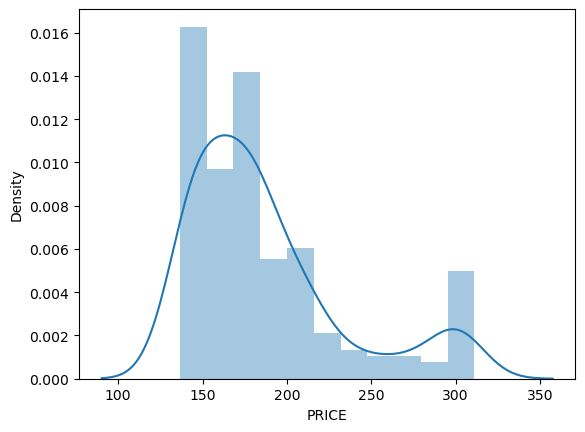

In [67]:
sns.distplot(df['PRICE'])
plt.show()
#We can see that our price column show a right sckwness. Most of the data points are smaller than the mean value. But the
# data is not as big to that it will effect the model 

### Linear regression

Mean Squared Error (MSE): 13.707536512178303
R-squared (R2): 0.994592461626392
Coefficients:                      0
 3.607111       UNRATE
 0.816298          CPI
 22.824927         GDP
 2.741655        MRATE
 5.226293      NewHome
 1.830808   Vacanthome
-0.421193      UMCSENT
 29.514107     Concost


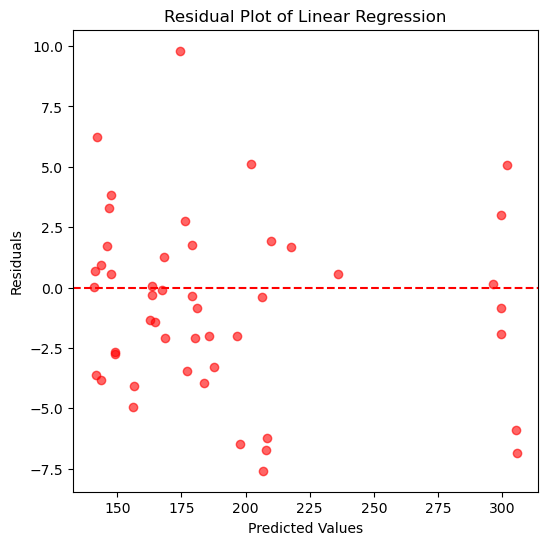

In [65]:
# Splitting the data into features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting MinMaxScaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transforming test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print("Coefficients:",pd.DataFrame(X.columns,model.coef_))

residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Linear Regression')
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
plt.show()

In [68]:
# The residual plot is not showing any patner and its randomly distributed so we can say model is performing good. But we 
# can see that most of the prediction are clustered aroud the right as our target is rightly sckweed data

In [42]:
X.columns

Index(['UNRATE', 'CPI', 'GDP', 'MRATE', 'NewHome', 'Vacanthome', 'UMCSENT',
       'Concost'],
      dtype='object')

In [43]:
# Population have a negative cofficients in the model .

In [44]:
## As we can see that r2 score is almost 1 so model is performing very well , but we will check it with cross validation 
## as there can be a bias in the model

In [48]:
from sklearn.model_selection import cross_val_score
# Splitting the data into features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a linear regression model
model = LinearRegression()

# Performing cross-validation (5-fold by default)
cv_scores = cross_val_score(model, X_scaled, y, scoring='r2')

# Printing R-squared scores for each fold
print("R-squared scores for each fold:", cv_scores)

# Calculating and printing average R-squared score
avg_r2_score = cv_scores.mean()
print(f"Average R-squared (R2) score: {avg_r2_score}")

R-squared scores for each fold: [0.64524713 0.83841477 0.9687802  0.62076369 0.83306034]
Average R-squared (R2) score: 0.7812532264108392


In [ ]:
# As seen the result of CV the average R1 score is near 0.78. So we can say that our model is performing good with the 
# current feature , We can perform feature selection for better result.

In [ ]:
#Lets try randomforest model for the dataset and check for the important feature

### Random Forest Regressor

Mean Squared Error (MSE): 13.693248701656257
R-squared (R2): 0.9945980980792736


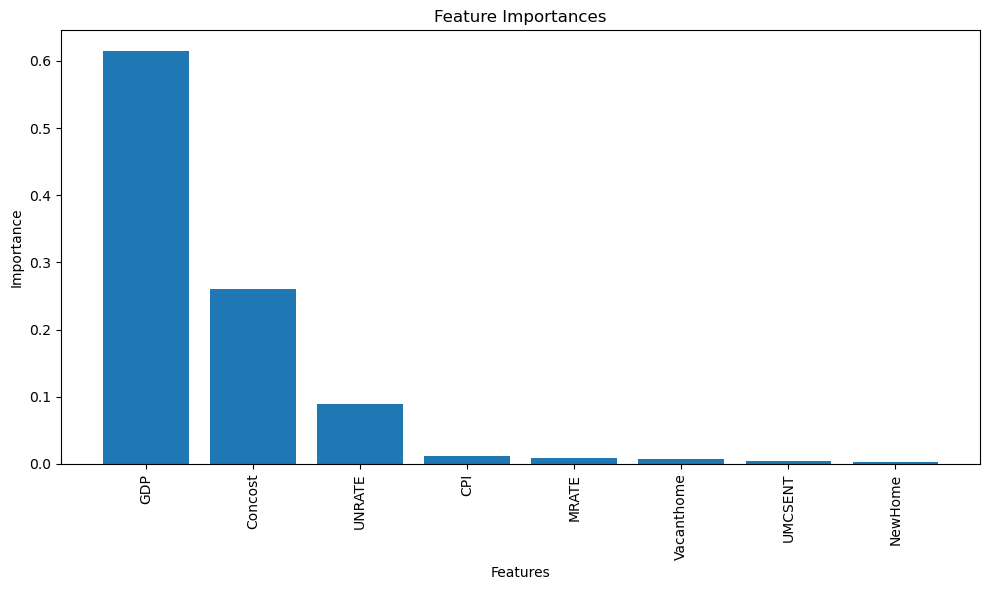

In [49]:
# Splitting the data into features and target variable
X = df.drop('PRICE', axis=1)  # Features
y = df['PRICE']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting MinMaxScaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transforming test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Creating a linear regression model
model = RandomForestRegressor()

# Training the model
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
importances = model.feature_importances_

# Sort the importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get the feature names
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], align='center')
plt.xticks(range(len(feature_names)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [50]:
# We can see that most important feature according to the random forest is GDP,Construction Cost , Unemployment Rate , CPI.

### Multicollinearity

In [53]:
# As we know multicolinearity reduce the performance of linear regg model , So we will use VIF to eliminate the co-linearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df[col_list]
vif_data =pd.DataFrame()
vif_data["feature"] =X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i)
                          for i in range(len(X.columns))]
vif_data

,feature,VIF
0,PRICE,2677.024265
1,UNRATE,24.280976
2,CPI,38.928098
3,GDP,935.723564
4,MRATE,92.623873
5,NewHome,59.213196
6,Vacanthome,295.959449
7,UMCSENT,111.568229
8,Concost,452.070481


In [54]:
# As shown in the result there is a high colinearity with the fature like GDP,ConCost , custome sentiment.

 ## Inferences from the Same

In our project, we conducted predictive modeling using Linear Regression and Random Forest Regression on a relatively small dataset exhibiting right-skewed distribution in the target variable.

The Linear Regression model exhibited a commendable performance with an average R-squared (R2) score of approximately 0.78. Notably, it identified Gross Domestic Product (GDP), Construction Costs, and Unemployment as prominent predictors significantly impacting the target variable.

In contrast, the Random Forest Regression outperformed, achieving an R-squared score close to 1. It highlighted GDP, Construction Costs, Unemployment, and Consumer Price Index (CPI) as the primary influential factors for predicting the target variable.

Both models emphasized the pivotal role of economic indicators such as GDP, Construction Costs, and Unemployment in explaining the variance within the dataset, albeit with varied predictive capabilities.


## Future Possibilities for the Project

The project offers several potential avenues for future exploration and enhancement:

1. **Feature Engineering:** Refine existing features or create derived features to potentially improve model performance. Exploring interactions or nonlinear relationships among predictors could unveil additional insights.

2. **Model Tuning:** Fine-tune hyperparameters, particularly for Random Forest, using grid searches or advanced optimization techniques to enhance predictive accuracy.

3. **Ensemble Methods:** Consider ensemble techniques like stacking or boosting to combine the strengths of different models, potentially boosting predictive power.

4. **Time-Series Analysis:** If relevant, explore temporal trends or incorporate time-series methods to capture dynamic patterns in the data.

5. **Domain-Specific Insights:** Collaborate with domain experts to incorporate their knowledge, potentially identifying new influential factors or gaining novel perspectives.

6. **Deployment:** Deploy effective models into production environments for real-time predictions or decision-making processes.

7. **Continuous Monitoring:** Regularly re-evaluate and update models with new data to ensure their relevance and accuracy over time.

Exploring these avenues could enrich the project, enhancing model robustness, predictive accuracy, and real-world applicability.


## Conclusion from the Project Analysis:


The analysis reveals distinct correlations between key factors and housing prices in the US:

**Positive Correlations:**
- **Consumer Price Index (CPI), GDP, Construction Costs, and Population:** These factors exhibit positive correlations with housing prices. When CPI and GDP increase, housing prices tend to rise. Similarly, an increase in construction costs and population coincides with an upward trend in housing prices.

**Negative Correlations:**
- **Unemployment Rate, Vacant Houses, Mortgage Rates, and Consumer Sentiment:** These factors demonstrate negative correlations with housing prices. Higher unemployment, increased vacancy rates, elevated mortgage rates, and lower consumer sentiment correspond to decreased housing prices. Notably, during times of high unemployment, housing prices tend to decrease due to reduced demand.

**Recent Trends:**
- Despite recent low CPI trends, housing prices remain high, indicating a deviation from the typical CPI-house price relationship. Similarly, while mortgage rates are high, housing prices have remained elevated, diverging from the anticipated impact of high mortgage rates on purchasing behavior.
- Decreasing vacant houses in recent times have contributed to higher housing prices. The reduced availability of new houses in the market has also elevated housing prices, contrary to the historical trend where an increased supply lowered prices.
- Although traditionally, high consumer sentiment aligned with increased housing prices, recent market conditions have seen high prices persist even with lower consumer sentiment.

**Impact of Construction Costs:**
- The analysis emphasizes a significant positive impact of higher construction costs on housing prices. As construction costs rise, housing prices tend to follow suit.

**Population Dynamics:**
- While historically population dynamics did not exhibit a substantial effect, recent increases in population have contributed to a rise in housing prices.

The observed trends provide valuable insights into the intricate relationship between economic indicators, market sentiments, and their collective influence on housing prices. These findings underscore the nuanced dynamics shaping the housing market.


In [79]:
print('------------------------'*15)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
